In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

aliabdelmenam_rdd_2022_path = kagglehub.dataset_download('aliabdelmenam/rdd-2022')
aadhamashraf_rdd_2022_encoded_labels_path = kagglehub.dataset_download('aadhamashraf/rdd-2022-encoded-labels')

print('Data source import complete.')


In [ ]:
# ! pip install ultralytics

In [ ]:
import os
import shutil
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# from ultralytics import YOLO

import tensorflow as tf
from tensorflow.keras import *
from tensorflow.keras.applications import EfficientNetB3 ,EfficientNetV2L , DenseNet201
from tensorflow.keras.losses import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.preprocessing import *

from sklearn.metrics import f1_score, classification_report

# **YOLO-Section**

Check out here 'https://www.kaggle.com/code/adhamashraf202200953/yolo-contribution/edit'

## **YAML file creation**

In [ ]:
yaml_content = """train: /kaggle/input/rdd-2022/RDD_SPLIT/train/images
val: /kaggle/input/rdd-2022/RDD_SPLIT/val/images
test: /kaggle/input/rdd-2022/RDD_SPLIT/test/images

nc: 5
names: ['longitudinal_crack', 'transverse_crack', 'alligator_crack', 'pothole', 'other_damage']
"""

file_path = "/kaggle/working/yamal_file.yaml"

with open(file_path, "w") as f:
    f.write(yaml_content)

print(f"YAML file saved at {file_path}")

YAML file saved at /kaggle/working/yamal_file.yaml


## **Training YOLO model**

In [ ]:
yolo_model = YOLO("yolov8n.pt")

yolo_model.train(data = file_path, epochs = 25 , imgsz = 640 , batch = 8 , save_period = 5)
yolo_model.train(data = file_path, epochs = 15 , imgsz = 960 , batch = 8 , save_period = 5)
yolo_model.train(data = file_path, epochs = 10 , imgsz = 1280 , batch = 8 , save_period = 5)

New https://pypi.org/project/ultralytics/8.3.130 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.129 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/yamal_file.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=F

train: Scanning /kaggle/input/rdd-2022/RDD_SPLIT/train/labels... 26869 images, 8097 backgrounds, 0 corrupt: 100%|██████████| 26869/26869 [01:40<00:00, 266.79it/s]

train: /kaggle/input/rdd-2022/RDD_SPLIT/train/images/Japan_006916.jpg: 1 duplicate labels removed
train: /kaggle/input/rdd-2022/RDD_SPLIT/train/images/Japan_011427.jpg: 1 duplicate labels removed


WARNING ⚠️ train: Cache directory /kaggle/input/rdd-2022/RDD_SPLIT/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 54.3±30.9 MB/s, size: 559.7 KB)


val: Scanning /kaggle/input/rdd-2022/RDD_SPLIT/val/labels... 5758 images, 1837 backgrounds, 0 corrupt: 100%|██████████| 5758/5758 [00:23<00:00, 249.33it/s]

val: /kaggle/input/rdd-2022/RDD_SPLIT/val/images/Japan_006536.jpg: 1 duplicate labels removed


WARNING ⚠️ val: Cache directory /kaggle/input/rdd-2022/RDD_SPLIT/val is not writeable, cache not saved.
Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      1.14G      2.045      3.837      1.783         18        640: 100%|██████████| 3359/3359 [07:04<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [01:03<00:00,  5.68it/s]


                   all       5758       9740      0.292      0.248      0.177     0.0753

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      1.43G      2.015      2.974      1.745         27        640: 100%|██████████| 3359/3359 [06:47<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [00:59<00:00,  6.03it/s]


                   all       5758       9740      0.335       0.29      0.225     0.0985

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      1.43G      2.043      2.789      1.778         17        640:  28%|██▊       | 939/3359 [01:48<04:06,  9.83it/s]

In [ ]:
!ls /kaggle/working/runs/detect/train
print()
!ls /kaggle/working/runs/detect/train2
print()
!ls /kaggle/working/runs/detect/train22

## **Preformance Metrices**

In [ ]:
from IPython.display import Image, display

display(Image(filename='runs/detect/train/confusion_matrix.png', width=600))
print('Confusion matrix - image size 640, epoch 40')
print()

display(Image(filename='runs/detect/train2/confusion_matrix.png', width=600))
print('Confusion matrix - image size 960, epoch 35')
print()

display(Image(filename='runs/detect/train22/confusion_matrix.png', width=600))
print('Confusion matrix - image size 1280, epoch 25')
print()


display(Image(filename='runs/detect/train/results.png', width=600))
print('image size 640, epoch 40')
print()

display(Image(filename='runs/detect/train2/results.png', width=600))
print('image size 960, epoch 35')
print()

display(Image(filename='runs/detect/train22/results.png', width=600))
print('image size 1280, epoch 25')
print()

In [ ]:
display(Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600))
print('image size 640, epoch 40')
print()

# Display for image size 960, epoch 35
display(Image(filename='runs/detect/train2/val_batch0_pred.jpg', width=600))
print('image size 960, epoch 35')
print()

# Display for image size 1280, epoch 25
display(Image(filename='runs/detect/train22/val_batch0_pred.jpg', width=600))
print('image size 1280, epoch 25')
print()

## **Validation**

In [ ]:
# # import ultralytics
# # from ultralytics import YOLO

# !yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=/kaggle/input/radroad-anomaly-detection/images/data.yaml
# print()

# !yolo task=detect mode=val model=runs/detect/train2/weights/best.pt data=/kaggle/input/radroad-anomaly-detection/images/data.yaml
# print()

# !yolo task=detect mode=val model=runs/detect/train22/weights/best.pt data=/kaggle/input/radroad-anomaly-detection/images/data.yaml
# print()

In [ ]:
# !yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=/kaggle/input/radroad-anomaly-detection/images/test/images
# print()

# !yolo task=detect mode=predict model=runs/detect/train2/weights/best.pt conf=0.25 source=/kaggle/input/radroad-anomaly-detection/images/test/images
# print()

# !yolo task=detect mode=predict model=runs/detect/train22/weights/best.pt conf=0.25 source=/kaggle/input/radroad-anomaly-detection/images/test/images
# print()

# **Non-Yolo-Solution**

## **Handling YOLO Formats and Generating Vectors**

## **Transforming & Understanding for the labels**

###  **How many Unique Class we Have ?**

In [ ]:
# def count_yolo_classes(label_dir):
#     class_ids = set()

#     for filename in os.listdir(label_dir):
#         if filename.endswith(".txt"):
#             filepath = os.path.join(label_dir, filename)
#             with open(filepath, 'r') as f:
#                 for line in f:
#                     parts = line.strip().split()
#                     if parts:  # avoid empty lines
#                         class_id = int(parts[0])
#                         class_ids.add(class_id)

#     print(f"Number of unique classes: {len(class_ids)}")
#     print(f"Classes found: {sorted(class_ids)}")

# directory_path = "/kaggle/input/rdd-2022/RDD_SPLIT/train/labels"
# count_yolo_classes(directory_path)

### **Frequency Resolving for lines each text file**

In [ ]:
# def count_lines_in_files(directory):
#     resolver = {}
#     for filename in os.listdir(directory):
#         if filename.endswith(".txt"):  # Process only .txt files
#             file_path = os.path.join(directory, filename)
#             with open(file_path, 'r') as file:
#                 line_count = sum(1 for line in file)
#                 if line_count in resolver :
#                     resolver[line_count]+=1
#                 else:
#                     resolver[line_count] = 1
#     return resolver

In [ ]:
# print(count_lines_in_files("/kaggle/input/rdd-2022/RDD_SPLIT/train/labels"))

In [ ]:
# print(count_lines_in_files("/kaggle/input/rdd-2022/RDD_SPLIT/test/labels"))

In [ ]:
# print(count_lines_in_files("/kaggle/input/rdd-2022/RDD_SPLIT/val/labels"))

#### **Verfying the numbers of lines that are returned**

In [ ]:
# def search_file_by_line_count(directory, line_count):
#     for filename in os.listdir(directory):
#         if filename.endswith('.txt'):
#             file_path = os.path.join(directory, filename)

#             with open(file_path, 'r') as file:
#                 lines = file.readlines()
#                 if len(lines) == line_count:
#                     print(f"File: {filename} ({len(lines)} lines)")
#                     print("Content:")
#                     print(''.join(lines))
#                     return

#     print("No matching file found.")

# search_file_by_line_count('/kaggle/input/rdd-2022/RDD_SPLIT/test/labels', 8)

### **Counting Classes in the Directory**

In [ ]:
# def count_classes_in_directory(directory):
#     resolver = defaultdict(int)

#     for filename in os.listdir(directory):
#         if filename.endswith(".txt"):
#             file_path = os.path.join(directory, filename)
#             with open(file_path, 'r') as file:
#                 for line in file:
#                     if line.strip():
#                         class_id = line.split()[0]
#                         resolver[class_id] += 1

#     return dict(resolver)

In [ ]:
# class_id_to_name = {
#     0: 'longitudinal_crack',
#     1: 'transverse_crack',
#     2: 'alligator_crack',
#     3: 'pothole',
#     4: 'other_damage'
# }

# class_names = list(class_id_to_name.values())
# num_classes = len(class_names)

In [ ]:
count_classes_in_directory("/kaggle/input/rdd-2022/RDD_SPLIT/train")

In [ ]:
count_classes_in_directory("/kaggle/input/rdd-2022/RDD_SPLIT/test")

In [ ]:
count_classes_in_directory("/kaggle/input/rdd-2022/RDD_SPLIT/val")

### **Generating the CSV Files**

In [ ]:
# # Define class mappings (human-readable damage labels)
# class_id_to_name = {
#     0: 'longitudinal_crack',
#     1: 'transverse_crack',
#     2: 'alligator_crack',
#     3: 'pothole',
#     4: 'other_damage'
# }

# class_names = list(class_id_to_name.values())
# num_classes = len(class_names)

# # Dataset paths
# original_base = '/kaggle/input/rdd-2022/RDD_SPLIT'
# splits = ['train', 'val', 'test']
# new_base = '/kaggle/working/'

# # Loop through the splits (train, val, test) to process CSVs
# for split in splits:
#     labels_dir = os.path.join(original_base, split, 'labels')
#     data = []

#     # Process each label file in the 'labels' directory
#     for label_file in os.listdir(labels_dir):
#         if not label_file.lower().endswith('.txt'):
#             continue


#         label_path = os.path.join(labels_dir, label_file)
#         label_vector = [0] * num_classes

#         with open(label_path, 'r') as f:
#             for line in f:
#                 class_id = int(line.strip().split()[0])
#                 if class_id in class_id_to_name:
#                     label_vector[class_id] = 1

#         # Assuming you have a naming convention for image files (e.g., the label file name matches the image file name)
#         img_file = label_file.replace('.txt', '.jpg')  # or .png, .jpeg based on your dataset format
#         data.append([img_file] + label_vector)

#     # Save the CSV file for the current split
#     df = pd.DataFrame(data, columns=['filename'] + class_names)
#     df.to_csv(os.path.join(new_base, f'{split}_labels.csv'), index=False)

## **Modeling Section**

In [ ]:
new_base = '/kaggle/input/rdd-2022/RDD_SPLIT'
batch_size = 32
target_size = (224, 224)
class_names = ['longitudinal_crack', 'transverse_crack', 'alligator_crack', 'pothole', 'other_damage']
num_classes = len(class_names)

train_df = pd.read_csv("/kaggle/input/rdd-2022-encoded-labels/train_labels.csv")
val_df = pd.read_csv("/kaggle/input/rdd-2022-encoded-labels/val_labels.csv")
test_df = pd.read_csv("/kaggle/input/rdd-2022-encoded-labels/test_labels.csv")

In [ ]:
def create_dataset(df, directory, batch_size, target_size, class_names, shuffle=False, repeat=False):
    filenames = df['filename'].apply(lambda x: os.path.join(directory, x)).values
    labels = df[class_names].values.astype('float32')

    dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))

    def load_image(path, label):
        img = tf.io.read_file(path)
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.image.resize(img, target_size)
        img = tf.cast(img, tf.float32) / 255.0
        return img, label

    dataset = dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)

    if shuffle:
        dataset = dataset.shuffle(buffer_size=1024)
    if repeat:
        dataset = dataset.repeat()

    return dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [ ]:
def predict_single_image(img_path, model, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    prediction = model.predict(img_array)

    predicted_class = np.argmax(prediction, axis=1)
    predicted_label = class_names[predicted_class[0]]

    plt.imshow(img)
    plt.title(f'Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()

    return predicted_label, prediction


In [ ]:
import tensorflow as tf

data_augmentation = tf.keras.Sequential([
    layers.Rescaling(1./255),
    layers.RandomFlip("horizontal"),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
    layers.RandomTranslation(0.1, 0.1),
])

In [ ]:
train_dir = os.path.join(new_base, 'train/images')
val_dir = os.path.join(new_base, 'val/images')
test_dir = os.path.join(new_base, 'test/images')

train_ds = create_dataset(train_df, train_dir, batch_size, target_size, class_names, shuffle=True, repeat=True)
val_ds = create_dataset(val_df, val_dir, batch_size, target_size, class_names)
test_ds = create_dataset(test_df, test_dir, batch_size, target_size, class_names)

steps_per_epoch = math.ceil(len(train_df) / batch_size)
validation_steps = math.ceil(len(val_df) / batch_size)
test_steps = math.ceil(len(test_df) / batch_size)

### **EfficientNetB3**

In [ ]:
def build_model_EfficientNetB3(input_shape=(224, 224, 3), num_classes=5):
    base_model = EfficientNetB3(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape
    )
    base_model.trainable = False

    inputs = layers.Input(shape=input_shape)
    x = data_augmentation(inputs)
    x = base_model(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256)(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(128)(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)
    return models.Model(inputs, outputs), base_model

In [ ]:
from tensorflow.keras.optimizers import Adam

model_efficentNet, base_model_efficientNet = build_model_EfficientNetB3()

model_efficentNet.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

checkpoint_cb = callbacks.ModelCheckpoint(
    'best_efficientnetb3.keras',
    save_best_only=True,
    monitor='val_binary_accuracy',
    mode='max'
)
early_stop_cb = callbacks.EarlyStopping(
    patience=8,
    restore_best_weights=True,
    monitor='val_loss'
)
reduce_lr_cb = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3
)

history = model_efficentNet.fit(
    train_ds,
    epochs=25,
    validation_data=val_ds,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[checkpoint_cb, early_stop_cb, reduce_lr_cb],
    verbose=1
)


base_model_efficientNet.trainable = True
model_efficentNet.compile(
    optimizer=Adam(1e-5),
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

history_fine = model_efficentNet.fit(
    train_ds,
    epochs=25,
    validation_data=val_ds,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[checkpoint_cb, reduce_lr_cb],
    verbose=1
)


43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/25


E0000 00:00:1746846693.901316      31 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_1_1/efficientnetb3_1/block1b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1746846704.144861      95 cuda_dnn.cc:529] Loaded cuDNN version 90300


840/840 ━━━━━━━━━━━━━━━━━━━━ 275s 285ms/step - binary_accuracy: 0.7780 - loss: 0.5176 - val_binary_accuracy: 0.7906 - val_loss: 0.4946 - learning_rate: 1.0000e-04
Epoch 2/25
840/840 ━━━━━━━━━━━━━━━━━━━━ 133s 159ms/step - binary_accuracy: 0.7872 - loss: 0.5057 - learning_rate: 1.0000e-04
Epoch 3/25
  1/840 ━━━━━━━━━━━━━━━━━━━━ 1:53 135ms/step - binary_accuracy: 0.7812 - loss: 0.5116

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_binary_accuracy available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: binary_accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: binary_

840/840 ━━━━━━━━━━━━━━━━━━━━ 155s 185ms/step - binary_accuracy: 0.7870 - loss: 0.5053 - val_binary_accuracy: 0.7906 - val_loss: 0.4943 - learning_rate: 1.0000e-04
Epoch 4/25
840/840 ━━━━━━━━━━━━━━━━━━━━ 131s 156ms/step - binary_accuracy: 0.7875 - loss: 0.5029 - learning_rate: 1.0000e-04
Epoch 5/25
840/840 ━━━━━━━━━━━━━━━━━━━━ 156s 185ms/step - binary_accuracy: 0.7877 - loss: 0.5026 - val_binary_accuracy: 0.7906 - val_loss: 0.4933 - learning_rate: 1.0000e-04
Epoch 6/25
840/840 ━━━━━━━━━━━━━━━━━━━━ 131s 156ms/step - binary_accuracy: 0.7875 - loss: 0.5033 - learning_rate: 1.0000e-04
Epoch 7/25
840/840 ━━━━━━━━━━━━━━━━━━━━ 159s 189ms/step - binary_accuracy: 0.7871 - loss: 0.5035 - val_binary_accuracy: 0.7906 - val_loss: 0.4944 - learning_rate: 1.0000e-04
Epoch 8/25
840/840 ━━━━━━━━━━━━━━━━━━━━ 133s 159ms/step - binary_accuracy: 0.7878 - loss: 0.5014 - learning_rate: 1.0000e-04
Epoch 9/25
840/840 ━━━━━━━━━━━━━━━━━━━━ 156s 186ms/step - binary_accuracy: 0.7875 - loss: 0.5012 - val_binary_accu

E0000 00:00:1746850443.099990      31 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_1_1/efficientnetb3_1/block1b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


840/840 ━━━━━━━━━━━━━━━━━━━━ 670s 682ms/step - binary_accuracy: 0.5419 - loss: 1.0118 - val_binary_accuracy: 0.7906 - val_loss: 0.4990 - learning_rate: 1.0000e-05
Epoch 2/25
840/840 ━━━━━━━━━━━━━━━━━━━━ 542s 645ms/step - binary_accuracy: 0.7875 - loss: 0.4808 - learning_rate: 1.0000e-05
Epoch 3/25
840/840 ━━━━━━━━━━━━━━━━━━━━ 571s 680ms/step - binary_accuracy: 0.7889 - loss: 0.4640 - val_binary_accuracy: 0.8056 - val_loss: 0.4408 - learning_rate: 1.0000e-05
Epoch 4/25
840/840 ━━━━━━━━━━━━━━━━━━━━ 542s 645ms/step - binary_accuracy: 0.8017 - loss: 0.4424 - learning_rate: 1.0000e-05
Epoch 5/25
840/840 ━━━━━━━━━━━━━━━━━━━━ 568s 676ms/step - binary_accuracy: 0.8084 - loss: 0.4262 - val_binary_accuracy: 0.8130 - val_loss: 0.4214 - learning_rate: 1.0000e-05
Epoch 6/25
840/840 ━━━━━━━━━━━━━━━━━━━━ 541s 644ms/step - binary_accuracy: 0.8144 - loss: 0.4132 - learning_rate: 1.0000e-05
Epoch 7/25
840/840 ━━━━━━━━━━━━━━━━━━━━ 565s 672ms/step - binary_accuracy: 0.8168 - loss: 0.4058 - val_binary_accu

In [ ]:
model_efficentNet.load_weights('best_efficientnetb3.keras')
y_pred = model_efficentNet.predict(test_ds, steps=test_steps)
y_pred = (y_pred > 0.5).astype(int)
y_true = test_df[class_names].values

180/180 ━━━━━━━━━━━━━━━━━━━━ 36s 176ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


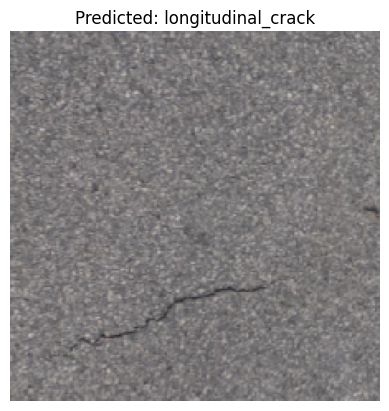

Predicted Class: longitudinal_crack


In [ ]:

predicted_label, prediction = predict_single_image( '/kaggle/input/rdd-2022/RDD_SPLIT/test/images/China_Drone_000008.jpg', model_efficentNet)
print(f"Predicted Class: {predicted_label}")

ValueError: x and y must have same first dimension, but have shapes (25,) and (13,)

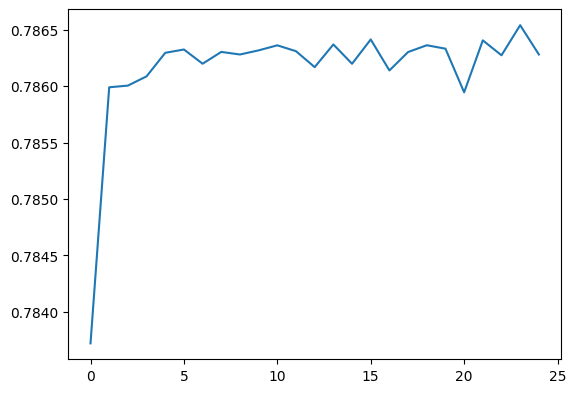

In [ ]:
# import matplotlib.pyplot as plt

# # Extract values and lengths based on actual training
# acc_1 = history.history['binary_accuracy']
# val_acc_1 = history.history['val_binary_accuracy']
# loss_1 = history.history['loss']
# val_loss_1 = history.history['val_loss']

# acc_2 = history_fine.history['binary_accuracy']
# val_acc_2 = history_fine.history['val_binary_accuracy']
# loss_2 = history_fine.history['loss']
# val_loss_2 = history_fine.history['val_loss']

# # Determine epochs for each phase
# epochs_1 = range(len(acc_1))
# epochs_2 = range(len(acc_1), len(acc_1) + len(acc_2))

# # Create a figure with 4 subplots (2 rows, 2 columns)
# plt.figure(figsize=(14, 10))

# # --- Accuracy Plot (Phase 1) ---
# plt.subplot(2, 2, 1)
# plt.plot(epochs_1, acc_1, label='Train Acc (Phase 1)')
# plt.plot(epochs_1, val_acc_1, label='Val Acc (Phase 1)')
# plt.title('Training and Validation Accuracy (Phase 1)')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()

# # --- Loss Plot (Phase 1) ---
# plt.subplot(2, 2, 2)
# plt.plot(epochs_1, loss_1, label='Train Loss (Phase 1)')
# plt.plot(epochs_1, val_loss_1, label='Val Loss (Phase 1)')
# plt.title('Training and Validation Loss (Phase 1)')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

# # --- Accuracy Plot (Phase 2) ---
# plt.subplot(2, 2, 3)
# plt.plot(epochs_2, acc_2, label='Train Acc (Phase 2)', linestyle='--')
# plt.plot(epochs_2, val_acc_2, label='Val Acc (Phase 2)', linestyle='--')
# plt.title('Training and Validation Accuracy (Phase 2)')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()

# # --- Loss Plot (Phase 2) ---
# plt.subplot(2, 2, 4)
# plt.plot(epochs_2, loss_2, label='Train Loss (Phase 2)', linestyle='--')
# plt.plot(epochs_2, val_loss_2, label='Val Loss (Phase 2)', linestyle='--')
# plt.title('Training and Validation Loss (Phase 2)')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

# # Adjust layout and show the plot
# plt.tight_layout()
# plt.show()


In [ ]:
from tensorflow.keras.applications import ResNet50

def build_model_ResNet50(input_shape=(224, 224, 3), num_classes=5):
    base_model = ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)
    base_model.trainable = False

    inputs = tf.keras.Input(shape=input_shape)
    x = data_augmentation(inputs)
    x = base_model(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256)(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(128)(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)

    return models.Model(inputs, outputs), base_model

In [ ]:
from tensorflow.keras.optimizers import Adam

model_resnet, base_model_reset = build_model_ResNet50()

model_resnet.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

checkpoint_cb = callbacks.ModelCheckpoint(
    'best_resnet.keras',
    save_best_only=True,
    monitor='val_binary_accuracy',
    mode='max'
)
early_stop_cb = callbacks.EarlyStopping(
    patience=8,
    restore_best_weights=True,
    monitor='val_loss'
)
reduce_lr_cb = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3
)

history = model_resnet.fit(
    train_ds,
    epochs=25,
    validation_data=val_ds,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[checkpoint_cb, early_stop_cb, reduce_lr_cb],
    verbose=1
)


base_model_reset.trainable = True
model_resnet.compile(
    optimizer=Adam(1e-5),
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

history_fine = model_resnet.fit(
    train_ds,
    epochs=25,
    validation_data=val_ds,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[checkpoint_cb, reduce_lr_cb],
    verbose=1
)

Epoch 1/25
259/840 ━━━━━━━━━━━━━━━━━━━━ 1:37 167ms/step - binary_accuracy: 0.7341 - loss: 0.5731

KeyboardInterrupt: 

### **DenseNet 101**

In [ ]:
def build_model_DenseNet201(input_shape=(224, 224, 3), num_classes=5):
    base_model = DenseNet201(include_top=False, weights='imagenet', input_shape=input_shape)
    base_model.trainable = False

    inputs = layers.Input(shape=input_shape)
    x = data_augmentation(inputs)
    x = base_model(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256)(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(128)(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)

    return models.Model(inputs, outputs), base_model

In [ ]:
from tensorflow.keras.optimizers import Adam

model_densenet, base_model_densnet = build_model_DenseNet201()

model_densenet.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

checkpoint_cb = callbacks.ModelCheckpoint(
    'best_densenet.keras',
    save_best_only=True,
    monitor='val_binary_accuracy',
    mode='max'
)
early_stop_cb = callbacks.EarlyStopping(
    patience=8,
    restore_best_weights=True,
    monitor='val_loss'
)
reduce_lr_cb = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3
)

history_pretrain = model_densenet.fit(
    train_ds,
    epochs=25,
    validation_data=val_ds,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[checkpoint_cb, early_stop_cb, reduce_lr_cb],
    verbose=1
)

base_model_densnet.trainable = True
model_densenet.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

# Train the model (Phase 2: Fine-tuning)
history_finetune = model_densenet.fit(
    train_ds,
    epochs=25,
    validation_data=val_ds,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[checkpoint_cb, reduce_lr_cb],
    verbose=1
)


74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/25
840/840 ━━━━━━━━━━━━━━━━━━━━ 282s 286ms/step - binary_accuracy: 0.7677 - loss: 0.5257 - val_binary_accuracy: 0.7906 - val_loss: 0.4920 - learning_rate: 1.0000e-04
Epoch 2/25
840/840 ━━━━━━━━━━━━━━━━━━━━ 188s 224ms/step - binary_accuracy: 0.7878 - loss: 0.5032 - learning_rate: 1.0000e-04
Epoch 3/25


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_binary_accuracy available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: binary_accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: binary_

840/840 ━━━━━━━━━━━━━━━━━━━━ 226s 269ms/step - binary_accuracy: 0.7882 - loss: 0.4995 - val_binary_accuracy: 0.7906 - val_loss: 0.4889 - learning_rate: 1.0000e-04
Epoch 4/25
840/840 ━━━━━━━━━━━━━━━━━━━━ 188s 224ms/step - binary_accuracy: 0.7869 - loss: 0.4998 - learning_rate: 1.0000e-04
Epoch 5/25
840/840 ━━━━━━━━━━━━━━━━━━━━ 226s 269ms/step - binary_accuracy: 0.7873 - loss: 0.4966 - val_binary_accuracy: 0.7905 - val_loss: 0.4836 - learning_rate: 1.0000e-04
Epoch 6/25
840/840 ━━━━━━━━━━━━━━━━━━━━ 188s 224ms/step - binary_accuracy: 0.7873 - loss: 0.4947 - learning_rate: 1.0000e-04
Epoch 7/25
840/840 ━━━━━━━━━━━━━━━━━━━━ 228s 271ms/step - binary_accuracy: 0.7874 - loss: 0.4923 - val_binary_accuracy: 0.7931 - val_loss: 0.4830 - learning_rate: 1.0000e-04
Epoch 8/25
840/840 ━━━━━━━━━━━━━━━━━━━━ 192s 228ms/step - binary_accuracy: 0.7888 - loss: 0.4893 - learning_rate: 1.0000e-04
Epoch 9/25
840/840 ━━━━━━━━━━━━━━━━━━━━ 227s 271ms/step - binary_accuracy: 0.7881 - loss: 0.4886 - val_binary_accu

### **VGG Family**